## Variant 2

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

C:\Users\katal\Documents\ProgramsPackages\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [171]:
# Reading our data
df = pd.read_csv('data/Iris.csv', index_col = 'Id')

In [172]:
# Cehcking first few rows
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [173]:
# checking columns types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [244]:
# Checking mean,std values
# Values seem to be adequate, that's why we may not use Normalisation, Standardization
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [246]:
# Checking for missing values
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [174]:
# Categorifying target variable
df['Species'] = df['Species'].astype('category')

In [13]:
# Checking column types again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null category
dtypes: category(1), float64(4)
memory usage: 6.1 KB


In [16]:
# Checking categorified target variable codes
df['Species'].cat.codes.unique()

array([0, 1, 2], dtype=int64)

In [175]:
# Specifying x and y
x, y = df.drop('Species', axis=1).values, df['Species']

# KMeans

In [181]:
def Kmeans(x, k=2, random_state=0, n_iters = 200):
    '''
    KMeans is a clustering algorihtm based on finding centroids which separate our instances in the best possible way.
    Algorithm: 1) Randomly pick k instance from x as centroids
               2) Compute distances from each observation to each centroid
               3) Assign nearest centroid's class to an observation
               4) Move centroid by calculating mean of grouped observations
               5) Repeat again till the convergence
    
    Argumetns:
    x - observations
    k - number of clusters
    random_state - specify to repeat the same results
    n_iters - number of iterations 
    '''
    np.random.seed(random_state) # Specifying random_state
    centroids = x[np.random.randint(0,x.shape[0], k), :] # Picking random centroids
    for i in range(n_iters): 
        c = [] # to store classes based on nearest centroid
        for i in x:
            dists = np.sqrt(np.sum((centroids - i)**2, axis=1)) # Computing distances (In this case i'm using Euclidian distances)
            c.append(np.argmin(dists))
        c = np.array(c) # converitng to numpy array to use boolean mapping
        for i in range(len(centroids)): 
            centroids[i] = np.sum(x[c == i], axis=0)/len(x[c == i]) # Moving centroids

    for i in range(len(centroids)):
        cost = np.sum(np.sum((x[c == i] - centroids[i])** 2, axis=1)) # Computing  sum of squared distances 
                                                                      # of each data point to it's assigned cluster

    return centroids, c, np.sum(cost)

In [185]:
costs = []
for k in range(1,11):
    centrs, classes, cost = Kmeans(x, k)
    costs.append(cost)

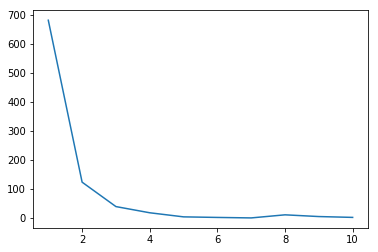

In [188]:
# We can use 'elbow' method to choose appropriate clusters number
# Here our line stops decreaing dramatically after k = 2, so we can choose k = 2
sns.lineplot(np.arange(1,11), costs)

In [270]:
c = classes

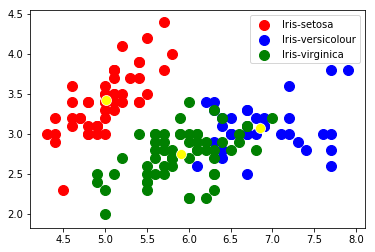

In [142]:
# Plotting our clusters and centroids
# Values for picked columns were chosen after tyring different random combinations
plt.scatter(x[c == 0, 0], x[c == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[c == 1, 0], x[c == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[c == 2, 0], x[c == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
sns.scatterplot(centroids[:, 0], centroids[:, 1], s = 100, color='yellow')

# Comparing it with sklearn's Kmeans

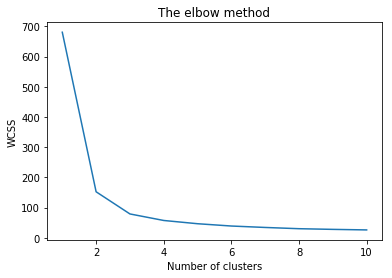

In [29]:
# K-means from sklearn
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init=10, random_state =0)
y_kmeans = kmeans.fit_predict(x)

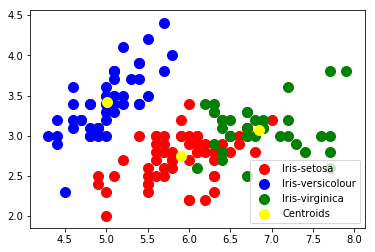

In [34]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Teting with another data

In [158]:
# To test our algorithm further we may 
# try to apply it on a dataset without explicit target variable
# Let's try it on TripAdvisor data

In [191]:
df2 = pd.read_csv('data/tripadvisor_review.csv')

In [250]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
User ID        980 non-null object
Category 1     980 non-null float64
Category 2     980 non-null float64
Category 3     980 non-null float64
Category 4     980 non-null float64
Category 5     980 non-null float64
Category 6     980 non-null float64
Category 7     980 non-null float64
Category 8     980 non-null float64
Category 9     980 non-null float64
Category 10    980 non-null float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [251]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [252]:
df2.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [253]:
x = df2.drop('User ID', axis=1).values

In [254]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
new_x = pca.fit_transform(x)

In [256]:
pca.explained_variance_

array([0.75406353, 0.31430734, 0.22085027])

In [255]:
costs = []
for k in range(1,11):
    centrs, classes, cost = Kmeans(new_x, k)
    costs.append(cost)

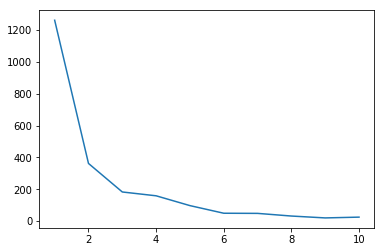

In [257]:
sns.lineplot(np.arange(1,11), costs)

In [ ]:
# We may try 2 or 3 clusters

In [258]:
centrs, classes, cost = Kmeans(new_x, 3)

In [259]:
len(x[classes==0]), len(x[classes==1]), len(x[classes==2]) 

(281, 292, 407)

In [260]:
c = classes

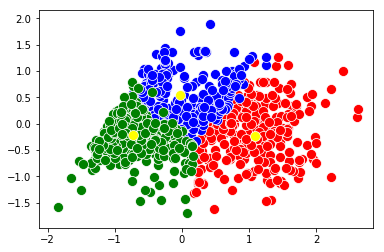

In [261]:
# We may notice that instances were differentiated pretty well
sns.scatterplot(new_x[c == 0, 0], new_x[c == 0, 1], s = 100, color = 'red',)
sns.scatterplot(new_x[c == 1, 0], new_x[c == 1, 1], s = 100, color = 'blue')
sns.scatterplot(new_x[c == 2, 0], new_x[c == 2, 1], s = 100, color = 'green')
sns.scatterplot(centrs[:, 0], centrs[:, 1], s = 100, color='yellow')  

In [ ]:
# Based on this we may specify a category for each user

In [266]:
!jupyter nbconvert --to script Kmeans.ipynb

[NbConvertApp] Converting notebook Kmeans.ipynb to script
[NbConvertApp] Writing 5956 bytes to Kmeans.py
